In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm

/Users/rociokiman/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/rociokiman/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [3]:
def log_ha_model(params,t):
    '''
    West 2008 model for log(LHalpha/Lbol)
    '''
    a,b,n,l = params
    factor = t**n - l**n
    return a/factor - b

In [158]:
a = 1.78 
b = 3.90 
n = 2.0 
l = 7.0
global params0 
params0= [a,b,n,l]

delta=0.2
ntot = 6000
t = np.linspace(6.6,l-0.1,ntot)
log_lhalbol = log_ha_model(params0,t)
logs_true = np.log(delta)
log_lhalbol += np.exp(logs_true)*np.random.randn(ntot)
log_lhalbol_error = np.ones(ntot)*delta

t1 = np.linspace(0,l-0.1,ntot)
log_lhalbol1 = log_ha_model(params0,t1)
logs_true1 = np.log(delta)
log_lhalbol1 += np.exp(logs_true1)*np.random.randn(ntot)
log_lhalbol_error1 = np.ones(ntot)*delta

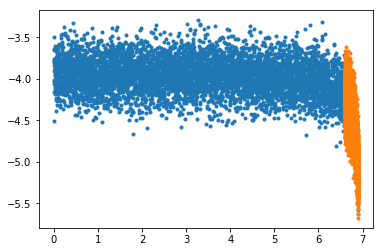

In [169]:
plt.plot(t1,log_lhalbol1,'.')
plt.plot(t,log_lhalbol,'.')

In [151]:
with pm.Model() as west_model:
    ages_inf = pm.Uniform("ages_inf", lower=0, upper=7, shape=ntot)

    #m = pm.Deterministic("m", pm.math.tan(theta))
    #b = pm.Deterministic("b", bperp/pm.math.cos(theta))
    
    a,b,n,l = params0
    
    factor = ages_inf**n - l**n

    mu = a/factor - b

    log_lhalbol0 = pm.Normal('log_lhalbol0',mu=mu,sd=pm.math.exp(logs_true),observed=log_lhalbol)

In [152]:
with west_model:
    np.random.seed(802941)
    trace = pm.sample(tune=1000, draws=1000, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ages_inf]
Sampling 2 chains: 100%|██████████| 4000/4000 [02:42<00:00, 24.69draws/s]
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


In [153]:
samples = pm.trace_to_dataframe(trace)

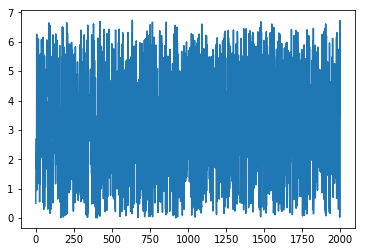

In [165]:
plt.plot(samples["ages_inf__0"])

In [161]:
pm.traceplot(trace);

/Users/rociokiman/anaconda3/lib/python3.7/site-packages/arviz/plots/traceplot.py:156: SyntaxWarning: max_plots is smaller than the number of variables to plot generating only max_plots traceplots
  SyntaxWarning,


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11677f378> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x11678cd90> (for post_execute):


KeyboardInterrupt: 

In [154]:
ages_list = np.array([np.mean(samples["ages_inf__{}".format(i)]) for i in range(ntot)])
ages_list_err = np.array([np.std(samples["ages_inf__{}".format(i)]) for i in range(ntot)])

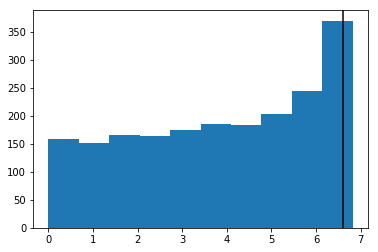

In [155]:
plt.hist(samples["ages_inf__100"])
plt.axvline(x=t[100],color='k')

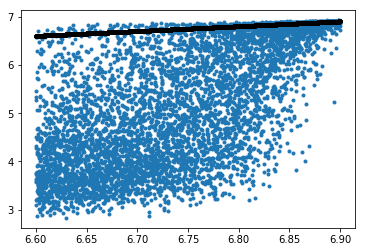

In [157]:
plt.plot(t,ages_list,'.')
plt.plot(t,t,'k.')